# E-commerce Sales Exploratory Data Analysis

This project performs an end-to-end exploratory data analysis on e-commerce sales data to
identify trends, profitability drivers, and business insights.


## Project Objective

The objective of this project is to analyze e-commerce sales data to identify sales trends, profitability drivers, and loss-making areas, and to provide actionable business recommendations based on data-driven insights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ecommerce_sales.csv")


In [2]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-198797,06-10-2024,01-05-2025,Second Class,CUST-4170,Ruben Ramirez,Home Office,South,Technology,Copiers,Virtual didactic synergy,2467.49,9,0.29,617.24
1,CA-233440,12-06-2023,05-05-2025,First Class,CUST-1196,Jesse Ortega,Home Office,Central,Furniture,Furnishings,Operative reciprocal projection,2751.66,1,0.09,922.14
2,CA-691533,18-04-2024,24-04-2025,Standard Class,CUST-2985,Kathryn Castro,Corporate,East,Furniture,Chairs,Multi-lateral incremental knowledge user,1199.66,9,0.03,220.44
3,CA-277218,02-11-2023,07-05-2025,First Class,CUST-2412,Sharon Taylor,Consumer,South,Office Supplies,Labels,Integrated bifurcated groupware,2335.57,6,0.30,620.16
4,CA-311967,15-07-2023,14-04-2025,First Class,CUST-3728,David Murillo,Corporate,South,Office Supplies,Binders,Re-contextualized human-resource benchmark,2540.88,5,0.03,258.06


In [3]:
df.shape

(5000, 15)

In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   object 
 1   Order Date     5000 non-null   object 
 2   Ship Date      5000 non-null   object 
 3   Ship Mode      5000 non-null   object 
 4   Customer ID    5000 non-null   object 
 5   Customer Name  5000 non-null   object 
 6   Segment        5000 non-null   object 
 7   Region         5000 non-null   object 
 8   Category       5000 non-null   object 
 9   Sub-Category   5000 non-null   object 
 10  Product Name   5000 non-null   object 
 11  Sales          5000 non-null   float64
 12  Quantity       5000 non-null   int64  
 13  Discount       5000 non-null   float64
 14  Profit         5000 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 586.1+ KB


In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2501.363102,5.501400,0.250084,447.942226
std,1424.757879,2.897737,0.144133,318.285948
min,7.370000,1.000000,0.000000,-99.960000
25%,1275.347500,3.000000,0.130000,174.525000
50%,2482.830000,6.000000,0.250000,444.955000
75%,3733.710000,8.000000,0.380000,725.157500
max,4997.570000,10.000000,0.500000,999.770000


<!-- Data Understanding – Initial Observations

The dataset contains 5,000 rows and 15 columns, representing e-commerce sales transactions.

It includes both categorical features (Order ID, Customer Name, Segment, Region, Category, Sub-Category, Ship Mode) and numerical features (Sales, Quantity, Discount, Profit).

The Order Date and Ship Date columns are currently stored as object type and will need to be converted to datetime format for time-based analysis.

There are no missing values in the dataset, as all columns have 5,000 non-null entries.

The Profit column contains negative values (minimum profit ≈ -99.96), indicating the presence of loss-making orders.

Sales values vary widely (from approximately 7.37 to 4,997.57), suggesting diverse customer purchasing behavior. -->

# Data Understanding – Initial Observations

<!-- # The dataset contains 5,000 rows and 15 columns, representing e-commerce sales transactions.

# It includes both categorical features (Order ID, Customer Name, Segment, Region, Category, Sub-Category, Ship Mode) and numerical features (Sales, Quantity, Discount, Profit).

# The Order Date and Ship Date columns are currently stored as object type and will need to be converted to datetime format for time-based analysis.

# There are no missing values in the dataset, as all columns have 5,000 non-null entries.

# The Profit column contains negative values (minimum profit ≈ -99.96), indicating the presence of loss-making orders.

# Sales values vary widely (from approximately 7.37 to 4,997.57), suggesting diverse customer purchasing behavior. -->


The dataset contains 5,000 rows and 15 columns, representing e-commerce sales transactions.

It includes both categorical features (Order ID, Customer Name, Segment, Region, Category, Sub-Category, Ship Mode) and numerical features (Sales, Quantity, Discount, Profit).

The Order Date and Ship Date columns are currently stored as object type and will need to be converted to datetime format for time-based analysis.

There are no missing values in the dataset, as all columns have 5,000 non-null entries.

The Profit column contains negative values (minimum profit ≈ -99.96), indicating the presence of loss-making orders.

Sales values vary widely (from approximately 7.37 to 4,997.57), suggesting diverse customer purchasing behavior.

# Data Cleaning & Preparation

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')


In [8]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-198797,2024-10-06,2025-05-01,Second Class,CUST-4170,Ruben Ramirez,Home Office,South,Technology,Copiers,Virtual didactic synergy,2467.49,9,0.29,617.24
1,CA-233440,2023-06-12,2025-05-05,First Class,CUST-1196,Jesse Ortega,Home Office,Central,Furniture,Furnishings,Operative reciprocal projection,2751.66,1,0.09,922.14
2,CA-691533,2024-04-18,2025-04-24,Standard Class,CUST-2985,Kathryn Castro,Corporate,East,Furniture,Chairs,Multi-lateral incremental knowledge user,1199.66,9,0.03,220.44
3,CA-277218,2023-11-02,2025-05-07,First Class,CUST-2412,Sharon Taylor,Consumer,South,Office Supplies,Labels,Integrated bifurcated groupware,2335.57,6,0.30,620.16
4,CA-311967,2023-07-15,2025-04-14,First Class,CUST-3728,David Murillo,Corporate,South,Office Supplies,Binders,Re-contextualized human-resource benchmark,2540.88,5,0.03,258.06


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'region', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       5000 non-null   object        
 1   order_date     5000 non-null   datetime64[ns]
 2   ship_date      5000 non-null   datetime64[ns]
 3   ship_mode      5000 non-null   object        
 4   customer_id    5000 non-null   object        
 5   customer_name  5000 non-null   object        
 6   segment        5000 non-null   object        
 7   region         5000 non-null   object        
 8   category       5000 non-null   object        
 9   sub-category   5000 non-null   object        
 10  product_name   5000 non-null   object        
 11  sales          5000 non-null   float64       
 12  quantity       5000 non-null   int64         
 13  discount       5000 non-null   float64       
 14  profit         5000 non-null   float64       
dtypes: datetime64[ns](2),

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       5000 non-null   object        
 1   order_date     5000 non-null   datetime64[ns]
 2   ship_date      5000 non-null   datetime64[ns]
 3   ship_mode      5000 non-null   object        
 4   customer_id    5000 non-null   object        
 5   customer_name  5000 non-null   object        
 6   segment        5000 non-null   object        
 7   region         5000 non-null   object        
 8   category       5000 non-null   object        
 9   sub-category   5000 non-null   object        
 10  product_name   5000 non-null   object        
 11  sales          5000 non-null   float64       
 12  quantity       5000 non-null   int64         
 13  discount       5000 non-null   float64       
 14  profit         5000 non-null   float64       
dtypes: datetime64[ns](2),

<!-- # Date columns were converted to datetime format to support time-based analysis. Column names were standardized for consistency and readability. 
# No duplicate records were found, and no rows were removed, ensuring data integrity. -->

Date columns were converted to datetime format to support time-based analysis. Column names were standardized for consistency and readability.
No duplicate records were found, and no rows were removed, ensuring data integrity.

In [13]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()


In [14]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'region', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'order_year',
       'order_month', 'order_month_name'],
      dtype='object')

In [15]:
df.groupby('order_month_name')['sales'].sum()


order_month_name
April         999697.85
August       1136034.87
December     1065082.25
February      939932.36
January      1033200.62
July         1112766.33
June         1078321.86
March        1031439.69
May          1107381.45
November      968382.87
October      1125787.72
September     908787.64
Name: sales, dtype: float64

In [16]:
df['profit_margin'] = df['profit'] / df['sales']


In [17]:
df[['sales', 'profit']].describe()


,sales,profit
count,5000.000000,5000.000000
mean,2501.363102,447.942226
std,1424.757879,318.285948
min,7.370000,-99.960000
25%,1275.347500,174.525000
50%,2482.830000,444.955000
75%,3733.710000,725.157500
max,4997.570000,999.770000


In [18]:
monthly_sales = df.groupby('order_month_name')['sales'].sum().sort_values()
monthly_sales


order_month_name
September     908787.64
February      939932.36
November      968382.87
April         999697.85
March        1031439.69
January      1033200.62
December     1065082.25
June         1078321.86
May          1107381.45
July         1112766.33
October      1125787.72
August       1136034.87
Name: sales, dtype: float64

Text(0, 0.5, 'Total Sales')

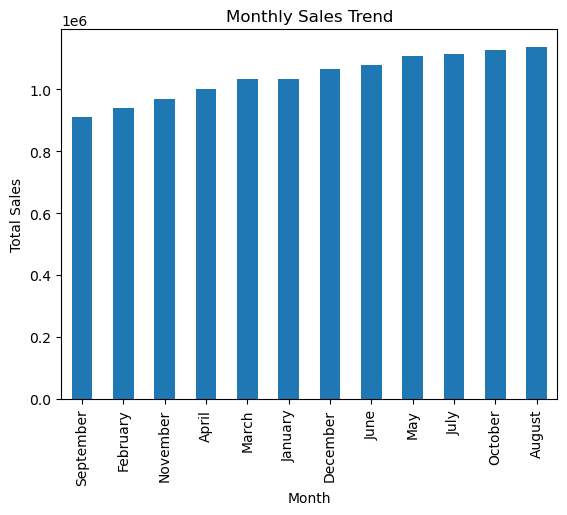

In [26]:
monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")



<!-- “This analysis shows that certain categories contribute high sales but lower profit margins, indicating potential pricing or discount issues.” -->

In [27]:
category_analysis = df.groupby('category')[['sales', 'profit']].sum()
category_analysis


,sales,profit
category,,
Furniture,4169553.39,753823.28
Office Supplies,4184882.48,754427.39
Technology,4152379.64,731460.46


Text(0, 0.5, 'Sales & Profit')

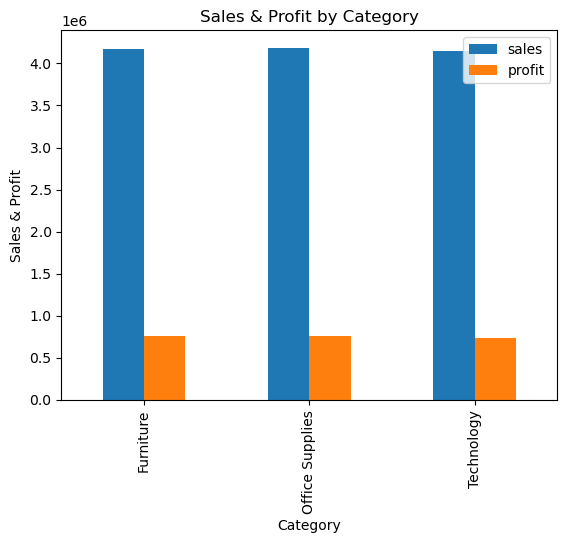

In [31]:
category_analysis.plot(kind='bar', title='Sales & Profit by Category')
plt.xlabel("Category")
plt.ylabel("Sales & Profit")


<!-- “This indicates that while the Technology category drives high revenue, its profitability is impacted by discounting strategies.” -->

In [32]:
loss_orders = df[df['profit'] < 0]
loss_orders.shape


(474, 19)

In [30]:
df.groupby('discount')['profit'].mean()


discount
0.00    371.790769
0.01    484.501727
0.02    482.338721
0.03    403.502700
0.04    468.153868
0.05    476.048305
0.06    461.543214
0.07    429.705962
0.08    489.513776
0.09    441.406173
0.10    425.804602
0.11    474.775743
0.12    437.823548
0.13    423.258681
0.14    436.091443
0.15    457.127812
0.16    430.586559
0.17    461.213299
0.18    444.113853
0.19    450.616700
0.20    471.499608
0.21    462.976154
0.22    453.815455
0.23    451.187010
0.24    467.817843
0.25    458.365333
0.26    453.403366
0.27    445.253263
0.28    392.538764
0.29    433.483419
0.30    480.198796
0.31    477.102909
0.32    481.984205
0.33    516.174105
0.34    387.541031
0.35    422.800208
0.36    387.830000
0.37    423.073883
0.38    444.854316
0.39    467.631935
0.40    444.587075
0.41    419.226852
0.42    439.914454
0.43    478.886600
0.44    484.962366
0.45    430.476869
0.46    456.994356
0.47    452.339804
0.48    413.421748
0.49    376.427586
0.50    490.940000
Name: profit, dtype: f

# Key Insights
Technology is the highest revenue-generating category, while Furniture shows comparatively lower profit margins.

Orders with higher discount levels tend to generate negative or reduced profit.

Sales exhibit noticeable variation across months, indicating seasonal demand patterns.

A subset of orders consistently results in losses, suggesting the need for pricing and discount optimization.



# Business Recommendations

Reduce discount levels on products that consistently generate losses to improve overall profitability.

Focus marketing and inventory planning on high-performing categories that show strong sales and profit margins.

Review pricing and cost structures for products with high sales but low or negative profit margins.

Analyze seasonal sales trends to optimize promotions and stock levels during peak months.